In [1]:
import Plasmon_Modeling as PM
import numpy as np

In [2]:
def createRectangle(center, width, height):
    return [[-width/2.0+center[0], height/2.0+center[1]],[-width/2.0+center[0], -height/2.0+center[1]],[width/2.0+center[0], -height/2.0+center[1]],[width/2.0+center[0], height/2.0+center[1]]]

In [3]:
def calculated_centroid(vertices):
    x_value, y_value = 0,0
    for i in vertices:
        x_value += i[0]
        y_value += i[1]
    
    return [x_value/len(vertices),y_value/len(vertices)]
    
def rotate_object(vertices_list, rotation_degrees):
    output_vertices = []
    theta = np.radians(rotation_degrees)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    for vertex in vertices_list:
        output_vertices.append([vertex[0]*c-vertex[1]*s,vertex[1]*c+vertex[0]*s])
    return output_vertices

def center_then_rotate(vertices, rotation_degrees):
    #First calculate the centroid
    centroid = np.array(calculated_centroid(vertices))
    #subtract centroid from the points
    modified_vertices = [np.array(i)-centroid for i in vertices]
    modified_vertices=rotate_object(modified_vertices,rotation_degrees)
    modified_vertices = [np.array(i)+centroid for i in modified_vertices]
    
    return modified_vertices

def counter_clockwise_sort(vertices):
    centroid=calculated_centroid(rotate_object(vertices,1))
    def func(array):
        print(array)
        return np.arctan(array[1]/array[0])

    to_sort=dict(zip(map(func,[np.array(i)-centroid for i in vertices]),vertices))
    # print(len(map(func,[np.array(i)-centroid for i in vertices])))
    # print(len(vertices))
    output=[]
    for key in sorted(to_sort):
        output.append(to_sort[key])

    return output

# def generate_permutations(input_list):
#     if len(input_list)==0:
#         return []
#     return generate_permuations_helper(input_list,[[]])
    
# def generate_permuations_helper(input_list,outputs):
#     if len(input_list)==1:
#         for i in outputs:
#             i.append(input_list[0])
#         return outputs
    
#     for i in outputs:
#         i.append(input_list[0])
    
#     return generate_permuations_helper(input_list[1:],outputs)

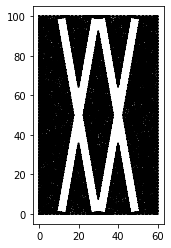

In [10]:
check = PM.RectangularSample(60,100)
vertices1=createRectangle([20,50],5,100)
vertices2=createRectangle([40,50],5,100)
check.placePolygonalReflector(center_then_rotate(vertices1,10))
check.placePolygonalReflector(center_then_rotate(vertices2,-10))
check.placePolygonalReflector(center_then_rotate(vertices1,-10))
check.placePolygonalReflector(center_then_rotate(vertices2,10))
check.placeCircularSource(30,50,5)
PM.mplot(check.getMesh(density=50))

Attempting to solve:


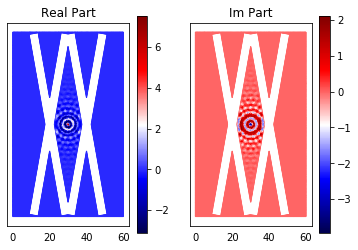

In [11]:
sigma = PM.S()
omega = PM.O()

sigma.set_sigma_values(1.1,10)
omega.set_omega_values(1,1)

run = check.run(omega,sigma,density = 200, to_plot=True)

In [16]:
sample = PM.RectangularSample(50,100)

#reflectors have to be placed before sources
sample.placeRectangularReflector(5,60,40,5)
sample.placeRectangularSource(5,10,40,5)


sigma = PM.S()
omega = PM.O()

sigma.set_sigma_values(1,10)
omega.set_omega_values(1,1)

# mesh = sample.getMesh(density = 50)
# plot(mesh)

check1 = sample.run(omega,sigma,density = 200)

Attempting to solve:


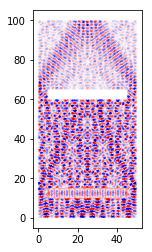

In [17]:
PM.mplot(check1.split(deepcopy = True)[0])

In [20]:
from dolfin import *
import numpy as np
editor = MeshEditor()
mesh = Mesh()
editor.open(mesh, 2, 2)  # top. and geom. dimension are both 2
editor.init_vertices(4)  # number of vertices
editor.init_cells(2)     # number of cells
editor.add_vertex(0, np.array([0.0, 0.0]))
editor.add_vertex(1, np.array([1.0, 0.0]))
editor.add_vertex(2, np.array([0.0, 1.0]))
editor.add_vertex(3, np.array([1.0, 1.0]))
editor.add_cell(0, np.array([0, 1, 3], dtype=np.uintp))
editor.add_cell(1, np.array([0, 2, 3], dtype=np.uintp))
editor.close()
plot(mesh)

TypeError: open(): incompatible function arguments. The following argument types are supported:
    1. (self: dolfin.cpp.mesh.MeshEditor, mesh: dolfin.cpp.mesh.Mesh, type: str, tdim: int, gdim: int, degree: int=1) -> None

Invoked with: <dolfin.cpp.mesh.MeshEditor object at 0x7f3d3bcc0768>, <dolfin.cpp.mesh.Mesh object at 0x7f3d33bb6fc0>, 2, 2